In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
%matplotlib inline

In [2]:
G=nx.read_edgelist('bio-celegans.txt', nodetype=int)

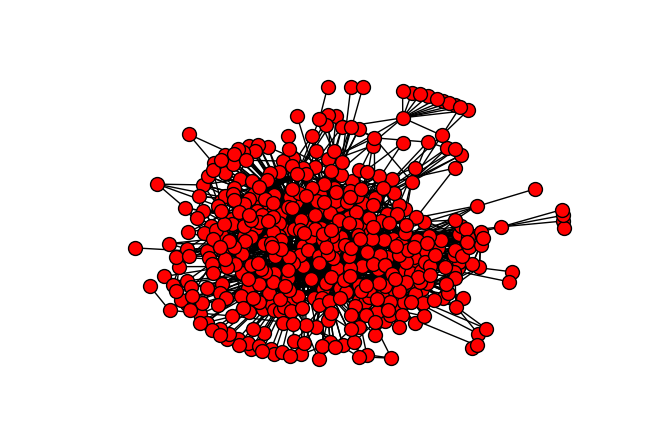

In [3]:
pos=nx.spring_layout(G,iterations=500)
nx.draw(G,pos,node_size=100)#,with_labels=True)

In [5]:
nodeNumber = nx.number_of_nodes(G)
print(nx.nodes(G))
print("Соседи вершины 1: ", *nx.all_neighbors(G, 1))
print("Общее количество вершин: ", nodeNumber)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

## Model 1

Выбираем случайно вершину i и активируем ее (заражаем, если говорить в терминах эпидемиологии). Далее, итерационно делаем следующее: 

1. Выбираем случайным образом одного неактивного соседа этой вершины, скажем вершину j. И с вероятностью p (параметр модели) заражаем вершину j. 

2. Вершина от которой пошло заражение (вершина i) с комплементарной вероятностью становится здоровой (т.е. с вероятностью 1-p).

3. Из зараженных случайно выбираем одну и повторяем шаги 1,2.

Вопрос, на который мы хотим ответить как зависит доля зараженных в стационарном состоянии (сделали много, много шагов) от параметра модели p.


In [6]:
inf = []
susc = []
numberSteps = 1000000
thresholdInf = 0.1
thresholdSusc = 0.9

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем случайным образом одного неактивного соседа этой вершины
    not_infected_neighbors = []
    for i in list(nx.all_neighbors(G, cur_infected_node)):
        if i not in inf:
            not_infected_neighbors.append(i)
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
    
    next_infected_node = None
    p = random.uniform(0, 1)
    print(p)
    if p > thresholdInf:
        next_infected_node = random.choice(not_infected_neighbors)
    
    p = random.uniform(0, 1)
    print(1 - p)
    if 1 - p > thresholdSusc:
        print("Вершина {} выздоровела".format(cur_infected_node))
        inf.remove(cur_infected_node)
        if next_infected_node == None:
            print("не заразили никого, и сами выздоровели")
            break
        
    if next_infected_node != None:
        print("Next infected: ", next_infected_node)
        cur_infected_node = next_infected_node
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  419
All infected nodes:  [419]
All neighbors of 419:  [146, 147, 186]
0.6243873187585437
0.9170269766093296
Вершина 419 выздоровела
Next infected:  186
-------------------------------
Current infected:  186
All infected nodes:  [186]
All neighbors of 186:  [1, 2, 3, 5, 13, 24, 25, 26, 27, 28, 29, 31, 32, 34, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 57, 61, 64, 66, 67, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 84, 85, 88, 89, 91, 92, 94, 95, 97, 98, 100, 111, 112, 113, 115, 116, 117, 118, 125, 127, 128, 129, 130, 132, 135, 136, 137, 140, 141, 144, 145, 146, 147, 148, 149, 153, 155, 157, 159, 160, 161, 162, 166, 173, 174, 176, 179, 182, 183, 184, 185, 187, 188, 190, 191, 194, 195, 197, 198, 201, 202, 203, 204, 205, 207, 208, 210, 211, 213, 215, 216, 217, 219, 220, 221, 226, 227, 228, 229, 230, 231, 233, 238, 239, 243, 246, 247, 251, 252, 253, 254, 255, 256, 259, 260, 261, 262, 269, 272, 273, 279, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296

In [19]:
def getInfectedFractionModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
    return inf

In [20]:
infected = getInfectedFractionModel1(G, 10000000, 0.8, 0.2, 1)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

Доля зараженных:  0.006622516556291391


In [21]:
prob = np.arange(0.01, 0.99, 0.02)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr = []
for p in prob:
    infected_arr = getInfectedFractionModel1(G, 10000000000, p, 1-p, startNode)
    inf_arr.append(len(infected_arr) / nx.number_of_nodes(G))

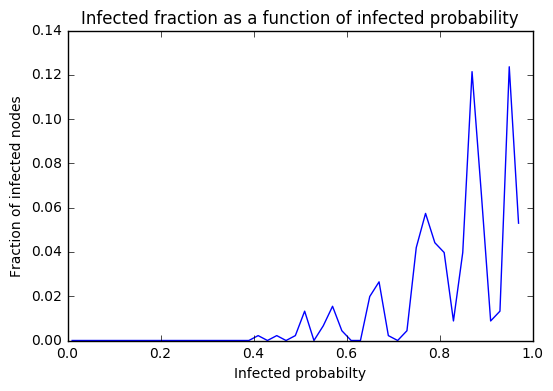

In [22]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob, inf_arr)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

## Model 2

Выбираем случайно вершину i и активируем ее. Далее, итерационно делаем следующее: 
1. Берем ВСЕХ неактивных соседей этой вершины и с вероятностью p (параметр модели) заражаем каждую из них. 
2. Вершина от которой пошло заражение (вершина i) становится здоровой (неактивной)
3. Из зараженных случайно выбираем одну и повторяем шаги 1, 2

In [24]:
inf = []
susc = []
numberSteps = 10
thresholdInf = 0.8
thresholdSusc = 0.1

inf_dict = defaultdict(list)

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем всех неактивных соседей этой вершины
    not_infected_neighbors = []
    for j in list(nx.all_neighbors(G, cur_infected_node)):
        if j not in inf:
            not_infected_neighbors.append(j)
    print('Соседи, которые могут быть заражены:', not_infected_neighbors)
    
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    if not_infected_neighbors:
        for elem in not_infected_neighbors:
            p = random.uniform(0, 1)
            print(p, elem)
            if p < thresholdInf:
                print('+ 1 заражение')
                inf_dict[i].append(elem)
                print('Добавили след. элемент: ', elem)
    print(inf_dict)         
    
    for key, val in inf_dict.items():
        print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
        
    #добавим в список зараженных новые вершины
    for j in inf_dict[i]:
        inf.append(j)
    
    if inf_dict[i]:
        inf.remove(cur_infected_node)
        cur_infected_node = random.choice(inf_dict[i])
        
    
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  254
All infected nodes:  [254]
Соседи, которые могут быть заражены: [186, 251, 255]
0.5721181857770832 186
+ 1 заражение
Добавили след. элемент:  186
0.25061885642434056 251
+ 1 заражение
Добавили след. элемент:  251
0.9386887005242529 255
defaultdict(<class 'list'>, {0: [186, 251]})
Словарь зараженных: на шаге 0 заражены: [186, 251]
-------------------------------
Current infected:  186
All infected nodes:  [186, 251]
Соседи, которые могут быть заражены: [1, 2, 3, 5, 13, 24, 25, 26, 27, 28, 29, 31, 32, 34, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 57, 61, 64, 66, 67, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 84, 85, 88, 89, 91, 92, 94, 95, 97, 98, 100, 111, 112, 113, 115, 116, 117, 118, 125, 127, 128, 129, 130, 132, 135, 136, 137, 140, 141, 144, 145, 146, 147, 148, 149, 153, 155, 157, 159, 160, 161, 162, 166, 173, 174, 176, 179, 182, 183, 184, 185, 187, 188, 190, 191, 194, 195, 197, 198, 201, 202, 203, 204, 205, 207, 208, 210, 211, 213, 215, 216, 217, 219, 220, 

In [25]:
def getInfectedFractionModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
        
        #for key, val in inf_dict.items():
        #    print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
            
    return inf

In [33]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0.89, startNode)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  390
Number of steps:  100
Infected probability:  0.89
Доля зараженных:  0.16556291390728478


In [36]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 1, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  319
Number of steps:  100
Infected probability:  1
[449, 186, 128, 387, 439, 263, 452, 13, 145, 146, 275, 397, 153, 154, 159, 161, 294, 295, 427, 300, 304, 311, 316, 318, 319, 339, 451, 324, 197, 198, 201, 203, 205, 190, 208, 209, 338, 211, 341, 342, 88, 89, 335, 220, 221, 442, 344, 408, 227, 228, 229, 230, 188, 365, 111, 112, 147, 245, 183, 127, 231, 14, 202, 155, 343, 267, 392, 75, 77, 271, 401, 337, 215, 280, 409, 32, 422, 102, 103, 104, 105, 106, 107, 45, 402, 176, 309, 297, 184, 317, 382, 426, 288, 298, 174, 388, 374, 394, 396, 78, 79, 414, 434, 285, 286, 287, 289, 290, 291, 292, 40, 172, 370, 435, 118, 430, 173]
Доля зараженных:  0.2582781456953642


In [37]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  212
Number of steps:  100
Infected probability:  0
[212]
Доля зараженных:  0.002207505518763797


In [48]:
prob_model2 = np.arange(0.01, 0.99, 0.05)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_model2 = []
for p in prob_model2:
    infected_arr = getInfectedFractionModel2(G, 10000, p, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.01
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.06
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.11
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.16
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.21
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  140
Number of steps:  10000
Infected probability:  0.26
----------------------------

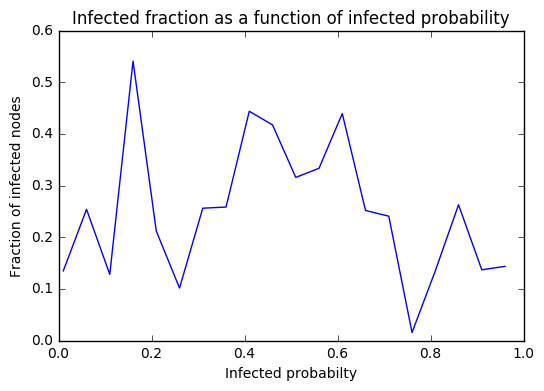

In [49]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob_model2, inf_arr_model2)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

In [54]:
start_nodes = np.arange(1, nx.number_of_nodes(G), 1)
inf_arr_model2 = []
for startNode in start_nodes:
    infected_arr = getInfectedFractionModel2(G, 10000, 0.5, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  2
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  3
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  5
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  6
Number of steps:  10000
Infected probability:  0.5
-----------------------------------
SIS model


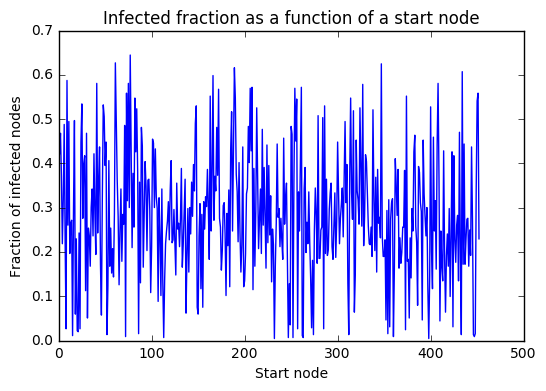

In [56]:
plt.title('Infected fraction as a function of a start node')
plt.plot(start_nodes, inf_arr_model2)
plt.xlabel('Start node')
plt.ylabel('Fraction of infected nodes')

Вывод: в модели 2 зависимости от вероятности заражения и стартовой вершины заражения не выявлено